In [ ]:
! pip install rake_nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
import json
import numpy as np
import pandas as pd
import matplotlib
from string import punctuation
import re

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from rake_nltk import Rake 
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
api_key = '03074c90692642459128a668e02a8668'

# Converting raw data to dataframe

In [ ]:
# function to take raw data from the API and process it into a list inorder to trnasform it into a pandas dataframe
def get_articles(file): 
    df = [] 
    for i in range(len(file)):
        article_dict = {}
        article_dict['title'] = file[i]['title']
        article_dict['author'] = file[i]['author']
        article_dict['source'] = file[i]['source']
        article_dict['description'] = file[i]['description']
        article_dict['content'] = file[i]['content']
        article_dict['pub_date'] = file[i]['publishedAt']
        article_dict['url'] = file[i]["url"]
        article_dict['photo_url'] = file[i]['urlToImage']
        df.append(article_dict)
    return df

In [ ]:
# Defining General News JSON
url = f'https://newsapi.org/v2/top-headlines?category=general&language=en&apiKey={api_key}'
response = requests.get(url)
data = response.json()
general_articles = data['articles']

In [ ]:
# transforminf the data from JSON dictionary to a pandas data frame
news_articles_df = pd.DataFrame(get_articles(general_articles))
# printing the head to check the format and the working of the get_articles function
news_articles_df.head()

,title,author,source,description,content,pub_date,url,photo_url
0,"S&P 500 falls, heads for third-straight down w...","Tanaya Macheel, Samantha Subin","{'id': None, 'name': 'CNBC'}",Stocks fell Friday as traders struggled to rec...,"Stocks fell Friday, building on the sharp loss...",2022-12-23T14:41:00Z,https://www.cnbc.com/2022/12/22/stock-market-f...,https://image.cnbcfm.com/api/v1/image/10717078...
1,"Covid, flu and RSV: what are the risks in Brit...",Nicola Davis,"{'id': None, 'name': 'The Guardian'}",As country prepares for first ‘normal’ Christm...,While this years festive season may be less gl...,2022-12-23T14:31:00Z,https://www.theguardian.com/society/2022/dec/2...,https://i.guim.co.uk/img/media/9968825640ee0aa...
2,"Quebec winter storm slices into Hydro's grid, ...",Montreal Gazette,"{'id': None, 'name': 'Montreal Gazette'}",Environment Canada has cancelled its heavy sno...,Environment Canada has cancelled its heavy sno...,2022-12-23T14:26:15Z,https://montrealgazette.com/news/local-news/sc...,https://smartcdn.gprod.postmedia.digital/montr...
3,"Again, poll projects Peter Obi to win 2023 ele...",Kabir Yusuf,"{'id': None, 'name': 'Premium Times'}","Conducted in early December, the results showe...",Labour Partys Peter Obi is still projected to ...,2022-12-23T14:23:37Z,https://www.premiumtimesng.com/news/headlines/...,https://media.premiumtimesng.com/wp-content/fi...
4,Private ambulance firms cashing in on strikes ...,Anna Isaac,"{'id': None, 'name': 'The Guardian'}",Exclusive: Companies tapping into growing dema...,Private ambulance companies have been cashing ...,2022-12-23T14:20:00Z,https://www.theguardian.com/society/2022/dec/2...,https://i.guim.co.uk/img/media/e31179d11509111...


In [ ]:
responses = list() # stores responses for various news sources
domains = ['wsj.com','aljazeera.com','bbc.co.uk','techcrunch.com', 'nytimes.com','bloomberg.com','businessinsider.com',
             'cbc.ca','cnbc.com','cnn.com','ew.com','espn.go.com','espncricinfo.com','foxnews.com', 'apnews.com',
             'news.nationalgeographic.com','nymag.com','reuters.com','rte.ie','thehindu.com','huffingtonpost.com',
             'irishtimes.com','timesofindia.indiatimes.com','washingtonpost.com','time.com','medicalnewstoday.com',
             'ndtv.com','theguardian.com','dailymail.co.uk','firstpost.com','thejournal.ie', 'hindustantimes.com',
             'economist.com','news.vice.com','usatoday.com','telegraph.co.uk','metro.co.uk','mirror.co.uk','news.google.com']
for domain in domains:
    rr = requests.get(url)
    data = rr.json()
    responses = data["articles"]
    news_articles_df = news_articles_df.append(pd.DataFrame(get_articles(responses)))

In [ ]:
print(news_articles_df.shape)
news_articles_df.head()

(800, 8)


,title,author,source,description,content,pub_date,url,photo_url
0,"S&P 500 falls, heads for third-straight down w...","Tanaya Macheel, Samantha Subin","{'id': None, 'name': 'CNBC'}",Stocks fell Friday as traders struggled to rec...,"Stocks fell Friday, building on the sharp loss...",2022-12-23T14:41:00Z,https://www.cnbc.com/2022/12/22/stock-market-f...,https://image.cnbcfm.com/api/v1/image/10717078...
1,"Covid, flu and RSV: what are the risks in Brit...",Nicola Davis,"{'id': None, 'name': 'The Guardian'}",As country prepares for first ‘normal’ Christm...,While this years festive season may be less gl...,2022-12-23T14:31:00Z,https://www.theguardian.com/society/2022/dec/2...,https://i.guim.co.uk/img/media/9968825640ee0aa...
2,"Quebec winter storm slices into Hydro's grid, ...",Montreal Gazette,"{'id': None, 'name': 'Montreal Gazette'}",Environment Canada has cancelled its heavy sno...,Environment Canada has cancelled its heavy sno...,2022-12-23T14:26:15Z,https://montrealgazette.com/news/local-news/sc...,https://smartcdn.gprod.postmedia.digital/montr...
3,"Again, poll projects Peter Obi to win 2023 ele...",Kabir Yusuf,"{'id': None, 'name': 'Premium Times'}","Conducted in early December, the results showe...",Labour Partys Peter Obi is still projected to ...,2022-12-23T14:23:37Z,https://www.premiumtimesng.com/news/headlines/...,https://media.premiumtimesng.com/wp-content/fi...
4,Private ambulance firms cashing in on strikes ...,Anna Isaac,"{'id': None, 'name': 'The Guardian'}",Exclusive: Companies tapping into growing dema...,Private ambulance companies have been cashing ...,2022-12-23T14:20:00Z,https://www.theguardian.com/society/2022/dec/2...,https://i.guim.co.uk/img/media/e31179d11509111...


# Cleaning and Pre-processing the data

In [ ]:
# function to exatract just the name of the source of the news article and exclude other details
def source_getter(df):
    source = []
    for source_dict in df['source']:
        source.append(source_dict['name'])
    df['source'] = source   #append the source to the df

In [ ]:
# this fuincton extracts the source name from the source dictionary as seen above
source_getter(news_articles_df)

In [ ]:
# converted the publication date to date time format for future analysis
news_articles_df['pub_date'] = pd.to_datetime(news_articles_df['pub_date']).apply(lambda x: x.date())

In [ ]:
#look for missing data
news_articles_df.isnull().sum() 

title            0
author         120
source           0
description      0
content         40
pub_date         0
url              0
photo_url       40
dtype: int64

- Since the data is purely textual data, filling which is not possible; so we drop them

In [ ]:
# droping the rows with missing data 
news_articles_df.dropna(inplace=True)
news_articles_df = news_articles_df[~news_articles_df['description'].isnull()]
# summarize the number of rows and columns in the dataset
print(news_articles_df.isnull().sum())
print(news_articles_df.shape)

title          0
author         0
source         0
description    0
content        0
pub_date       0
url            0
photo_url      0
dtype: int64
(680, 8)


In [ ]:
# combine the title and the content to get one dataframe column
news_articles_df['combined_text'] = news_articles_df['title'].map(str) +" "+ news_articles_df['content'].map(str) 
news_articles_df.head()

,title,author,source,description,content,pub_date,url,photo_url,combined_text
0,"S&P 500 falls, heads for third-straight down w...","Tanaya Macheel, Samantha Subin",CNBC,Stocks fell Friday as traders struggled to rec...,"Stocks fell Friday, building on the sharp loss...",2022-12-23,https://www.cnbc.com/2022/12/22/stock-market-f...,https://image.cnbcfm.com/api/v1/image/10717078...,"S&P 500 falls, heads for third-straight down w..."
1,"Covid, flu and RSV: what are the risks in Brit...",Nicola Davis,The Guardian,As country prepares for first ‘normal’ Christm...,While this years festive season may be less gl...,2022-12-23,https://www.theguardian.com/society/2022/dec/2...,https://i.guim.co.uk/img/media/9968825640ee0aa...,"Covid, flu and RSV: what are the risks in Brit..."
2,"Quebec winter storm slices into Hydro's grid, ...",Montreal Gazette,Montreal Gazette,Environment Canada has cancelled its heavy sno...,Environment Canada has cancelled its heavy sno...,2022-12-23,https://montrealgazette.com/news/local-news/sc...,https://smartcdn.gprod.postmedia.digital/montr...,"Quebec winter storm slices into Hydro's grid, ..."
3,"Again, poll projects Peter Obi to win 2023 ele...",Kabir Yusuf,Premium Times,"Conducted in early December, the results showe...",Labour Partys Peter Obi is still projected to ...,2022-12-23,https://www.premiumtimesng.com/news/headlines/...,https://media.premiumtimesng.com/wp-content/fi...,"Again, poll projects Peter Obi to win 2023 ele..."
4,Private ambulance firms cashing in on strikes ...,Anna Isaac,The Guardian,Exclusive: Companies tapping into growing dema...,Private ambulance companies have been cashing ...,2022-12-23,https://www.theguardian.com/society/2022/dec/2...,https://i.guim.co.uk/img/media/e31179d11509111...,Private ambulance firms cashing in on strikes ...


Applying Text Preprocessing steps: In the followting sections, some of the text preprocessing steps were applied to the data. The steps included:
- Tokenization
- Removing the non ASCII characters from the text
- Stop words removal
- Removing punctuations, apostrophe, special characters etc
- lemmatize the text

In [ ]:
# Function to remove non-ascii characters from the text
def _removeNonAscii(s): 
    return "".join(i for i in s if ord(i)<128)

In [ ]:
# function to remove the punctuations, apostrophe, special characters using regular expressions
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = text.replace('(ap)', '')
    text = re.sub(r"\'s", " is ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\\", "", text)
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    text = re.sub('[^a-zA-Z ?!]+', '', text)
    text = _removeNonAscii(text)
    text = text.strip()
    return text

In [ ]:
# stop words are the words that convery little to no information about the actual content like the words:the, of, for etc
def remove_stopwords(word_tokens):
    filtered_sentence = [] 
    stop_words = stopwords.words('english')
    specific_words_list = ['char', 'u', 'hindustan', 'doj', 'washington'] 
    stop_words.extend(specific_words_list )
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    return filtered_sentence

In [ ]:
# function for lemmatization 
def lemmatize(x):
    lemmatizer = WordNetLemmatizer()
    return' '.join([lemmatizer.lemmatize(word) for word in x])

In [ ]:
# splitting a string, text into a list of tokens
tokenizer = RegexpTokenizer(r'\w+')
def tokenize(x): 
    return tokenizer.tokenize(x)

In [ ]:
# applying all of these functions to the our dataframe 
news_articles_df['combined_text'] = news_articles_df['combined_text'].map(clean_text)
news_articles_df['tokens'] = news_articles_df['combined_text'].map(tokenize)
news_articles_df['tokens'] = news_articles_df['tokens'].map(remove_stopwords)
news_articles_df['lems'] =news_articles_df['tokens'].map(lemmatize)

In [ ]:
news_articles_df.head()

,title,author,source,description,content,pub_date,url,photo_url,combined_text,tokens,lems
0,"S&P 500 falls, heads for third-straight down w...","Tanaya Macheel, Samantha Subin",CNBC,Stocks fell Friday as traders struggled to rec...,"Stocks fell Friday, building on the sharp loss...",2022-12-23,https://www.cnbc.com/2022/12/22/stock-market-f...,https://image.cnbcfm.com/api/v1/image/10717078...,s p falls heads for third straight down week c...,"[p, falls, heads, third, straight, week, cnbc,...",p fall head third straight week cnbc stock fel...
1,"Covid, flu and RSV: what are the risks in Brit...",Nicola Davis,The Guardian,As country prepares for first ‘normal’ Christm...,While this years festive season may be less gl...,2022-12-23,https://www.theguardian.com/society/2022/dec/2...,https://i.guim.co.uk/img/media/9968825640ee0aa...,covid flu and rsv what are the risks in britai...,"[covid, flu, rsv, risks, britain, christmas, g...",covid flu rsv risk britain christmas guardian ...
2,"Quebec winter storm slices into Hydro's grid, ...",Montreal Gazette,Montreal Gazette,Environment Canada has cancelled its heavy sno...,Environment Canada has cancelled its heavy sno...,2022-12-23,https://montrealgazette.com/news/local-news/sc...,https://smartcdn.gprod.postmedia.digital/montr...,quebec winter storm slices into hydro is grid ...,"[quebec, winter, storm, slices, hydro, grid, p...",quebec winter storm slice hydro grid power out...
3,"Again, poll projects Peter Obi to win 2023 ele...",Kabir Yusuf,Premium Times,"Conducted in early December, the results showe...",Labour Partys Peter Obi is still projected to ...,2022-12-23,https://www.premiumtimesng.com/news/headlines/...,https://media.premiumtimesng.com/wp-content/fi...,again poll projects peter obi to win election ...,"[poll, projects, peter, obi, win, election, pr...",poll project peter obi win election premium ti...
4,Private ambulance firms cashing in on strikes ...,Anna Isaac,The Guardian,Exclusive: Companies tapping into growing dema...,Private ambulance companies have been cashing ...,2022-12-23,https://www.theguardian.com/society/2022/dec/2...,https://i.guim.co.uk/img/media/e31179d11509111...,private ambulance firms cashing in on strikes ...,"[private, ambulance, firms, cashing, strikes, ...",private ambulance firm cashing strike nh press...


In [ ]:
# finding the keywords using the rake algorithm from NLTK
# rake is Rapid Automatic Keyword Extraction algorithm, and is used for domain independent keyword extraction
news_articles_df['keywords'] = ""
for index,row in news_articles_df.iterrows():
    comb_text = row['combined_text']
    r = Rake()
    r.extract_keywords_from_text(comb_text)
    key_words_dict = r.get_word_degrees()
    row['keywords'] = list(key_words_dict.keys())

In [ ]:
# applying the fucntion to the dataframe
news_articles_df['keywords'] = news_articles_df['keywords'].map(remove_stopwords)
news_articles_df['lems'] =news_articles_df['keywords'].map(lemmatize)

In [ ]:
news_articles_df.head()
news_articles_df.to_csv('news_articles_clean.csv', index = False)

# Sentimental Analysis of News Articles

In [ ]:
# calculating the polarity of the news articles 
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
results = []
for line in news_articles_df['lems'] :
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

In [ ]:
# Creating a new dataframe of only the polarity score, the headline and the source of the news 
headlines_polarity = pd.DataFrame.from_records(results)
temp = []
for line in news_articles_df['source'] :
    temp.append(line)
headlines_polarity['source'] =temp

In [ ]:
# categorize news as positive or negative based on the compound score obtained
headlines_polarity['label'] = 0

# I have considered the news as positive if the compound score is greater than 0.2 hence the label 1
headlines_polarity.loc[headlines_polarity['compound'] > 0.2, 'label'] = 1

# if the compound score is below 0.2 then it is considered negative 
headlines_polarity.loc[headlines_polarity['compound'] < -0.2, 'label'] = -1

# word count of news headlines is calculated
headlines_polarity['word_count'] = headlines_polarity['headline'].apply(lambda x: len(str(x).split()))

In [ ]:
headlines_polarity.head()

,neg,neu,pos,compound,headline,source,label,word_count
0,0.164,0.772,0.064,-0.4588,p fall head third straight week cnbc stock fel...,CNBC,-1,27
1,0.258,0.653,0.089,-0.5719,covid flu rsv risk britain christmas guardian ...,The Guardian,-1,27
2,0.126,0.745,0.129,0.0258,quebec winter storm slice hydro grid power out...,Montreal Gazette,0,30
3,0.000,0.726,0.274,0.8074,poll project peter obi win election premium ti...,Premium Times,1,25
4,0.227,0.615,0.159,-0.2732,private ambulance firm cashing strike nh press...,The Guardian,-1,25


In [ ]:
#headlines_polarity.label.value_counts()
#headlines_polarity.groupby('source').label.value_counts()
# Grouping the news articles by their source and calculating their mean polarity  
gk = headlines_polarity.groupby(['source', 'label']) 
fk= headlines_polarity.groupby('source')['compound'].mean()
fk = fk.to_frame()
fk.to_csv('mean_polarity.csv', index = 'source')

# Visualization

In [ ]:
! pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.9 MB/s 


In [ ]:
! pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install scattertext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.4 MB 4.4 MB/s 
     |████████████████████████████████| 24.1 MB 11.2 MB/s 
     |████████████████████████████████| 67 kB 5.3 MB/s 
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9307 sha256=2bef617329050ba74d3adeadb4156f733b33ceb33e25fb86fec45250c4cc498b
  Stored in directory: /root/.cache/pip/wheels/8d/62/8b/71813348245ae1bcbae179193bbc72db819e8057e89298a6ac
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20443 sha256=1ed53f3143e100ac516271348075d94b347d686d4692a6b6f6bfc34d604881d5
  Stored in directory: /root/.cache/pip/wheels/6a/65/c4/d27eeee9ba3fc150a0dae150519591103b9e0dbffde3ae77dc
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3530 sha256=b80a7bf6ddff8f8b836081e01434ba25ec03554613580b7790b8e227aae01aa2
  Stored in directory: /root/.cache/pip/wheels/ba/d9/a0

In [ ]:
# libraries
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings 
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import plotly.graph_objs as go
#import plotly.plotly as py
import chart_studio.plotly as py
import cufflinks
pd.options.display.max_columns = 30
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import scattertext as st

[Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')]

Text(0, 0.5, 'Percentage')

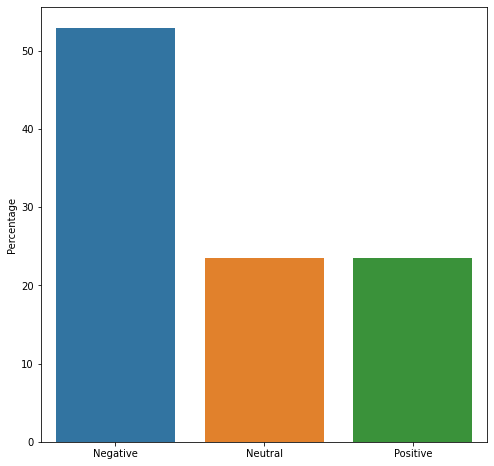

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(8, 8))
counts = headlines_polarity.label.value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")
plt.show()

### Wordcloud

<Figure size 1080x1080 with 0 Axes>

(-0.5, 1499.5, 1199.5, -0.5)

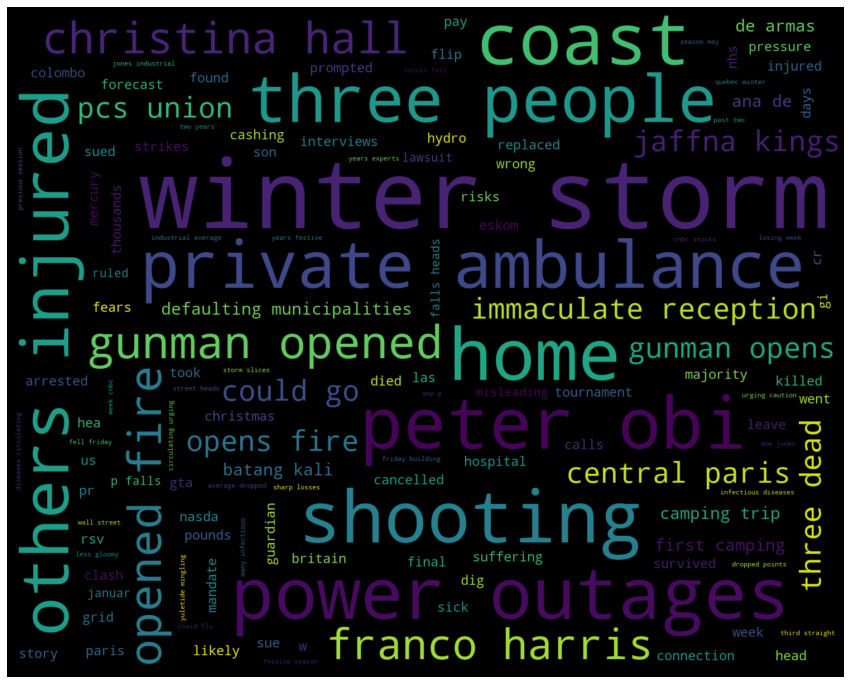

In [ ]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

data = news_articles_df
stop = ["https", "co", "char","chars"] + list(stop_words)
wc = WordCloud(stopwords=stop, max_words=700, margin=10, background_color='black',
scale=3, relative_scaling = 0.4, width=500, height=400,
random_state=1).generate(' '.join(data['combined_text']))
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
headlines_polarity

,neg,neu,pos,compound,headline,source,label,word_count
0,0.164,0.772,0.064,-0.4588,p fall head third straight week cnbc stock fel...,CNBC,-1,27
1,0.258,0.653,0.089,-0.5719,covid flu rsv risk britain christmas guardian ...,The Guardian,-1,27
2,0.126,0.745,0.129,0.0258,quebec winter storm slice hydro grid power out...,Montreal Gazette,0,30
3,0.000,0.726,0.274,0.8074,poll project peter obi win election premium ti...,Premium Times,1,25
4,0.227,0.615,0.159,-0.2732,private ambulance firm cashing strike nh press...,The Guardian,-1,25
...,...,...,...,...,...,...,...,...
675,0.067,0.863,0.070,0.0258,winter storm put million alert coast record lo...,CNN,0,30
676,0.370,0.630,0.000,-0.8555,three dead others injured gunman open fire cen...,9News,-1,19
677,0.000,0.906,0.094,0.4019,ontario winter storm school closed travel head...,CP24 Toronto's Breaking News,1,28
678,0.038,0.857,0.105,0.4767,batang kali landslide son next life say touchi...,The Star Online,1,29
